### ДОМАШНЕЕ ЗАДАНИЕ

Визуализируйте корреляцию между 7 числовыми признаками, использованными для обучения модели, и залогируйте изображение в Comet.

In [74]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from comet_ml import Experiment


In [75]:
# Создаем эксперимент с помощью API ключа
experiment = Experiment(
    api_key='ePlnsHLNWRugM1d3PgEBVCT4N',
    project_name='medical-appointment',
    workspace='anton',
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/anton/medical-appointment/cdd54a1807404c269ba12013469131e7



In [76]:
# загрузка данных
df = pd.read_csv('data/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [77]:
# Удалим аномальные значения возраста
df = df[(df.Age >= 0) & (df.Age <= 110)]
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

In [78]:
# вывод структуры данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [79]:
# закодируем данные столбца No-show
df['No-show'] = df['No-show'].replace({'No': 0, 'Yes': 1})
y = df['No-show']
# зафиксируем 7 числовых признаков переменной numeric_data
numeric_data = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']


{'web': 'https://www.comet.com/api/image/download?imageId=f131f59d898d41e5a7cf355423c976a8&experimentKey=cdd54a1807404c269ba12013469131e7',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=f131f59d898d41e5a7cf355423c976a8&experimentKey=cdd54a1807404c269ba12013469131e7',
 'imageId': 'f131f59d898d41e5a7cf355423c976a8'}

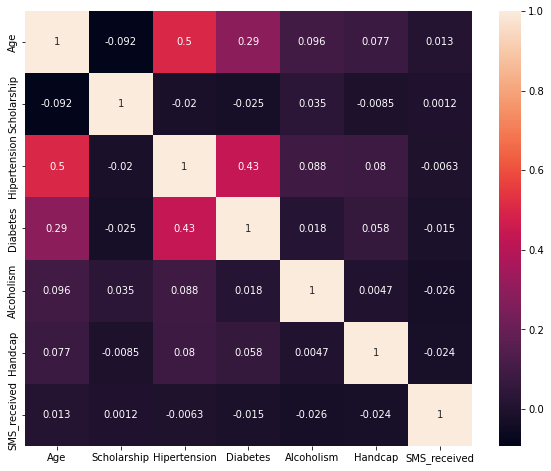

In [80]:
# построим тепловую матрицу корреляции 7 выбранных числовых признаков 
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[numeric_data].corr(), annot=True)
#логируем гистограмму
experiment.log_figure(figure=plt)

In [81]:
# удалим нечисловые признаки и столбец No-show 
df.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show'], axis=1, inplace = True)
# кодировка данных признака Gender
df = pd.get_dummies(df, columns = ['Gender'])
df

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M
0,62,0,1,0,0,0,0,1,0
1,56,0,0,0,0,0,0,0,1
2,62,0,0,0,0,0,0,1,0
3,8,0,0,0,0,0,0,1,0
4,56,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,1,0
110523,51,0,0,0,0,0,1,1,0
110524,21,0,0,0,0,0,1,1,0
110525,38,0,0,0,0,0,1,1,0


In [82]:
# Шкалирование данных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

In [83]:
# Инициализация модели
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
random_state = 43

In [84]:
# Обучение модели
logreg.fit(X, y)

LogisticRegression()

In [85]:
# Логирование параметров обучения
params={"random_state":random_state,
        "model_type":"logreg"
}
experiment.log_parameters(params)

In [86]:
# Предсказания модели
y_pred = logreg.predict(X)

In [87]:
# Анализ модели
accuracy = accuracy_score(y, y_pred)
print("Доля правильных ответов: {:6.3f}".format(accuracy))

Доля правильных ответов:  0.798


In [88]:
# Логирование метрик
metrics = {"accuracy":accuracy}
experiment.log_metrics(metrics)

In [89]:
#  вывод приборной панели Comet для эксперимента
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())
experiment.display()

In [90]:
# завершение эксперимента
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/anton/medical-appointment/cdd54a1807404c269ba12013469131e7
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class       : auto
COMET INFO:     n_jobs            : 1
COMET INFO:     penalty           : l2
COMET INFO:     random_state      : 43